## Import Packages

In [1]:
#importing some useful packages
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# IPython
from IPython.display import display, Image

# PIL etc
import PIL.Image
from cStringIO import StringIO

# tools
import tools as t

%matplotlib inline

In [2]:
image_file_list = os.listdir("test_images/")

images = []

for image_filename in image_file_list:
    image = mpimg.imread('test_images/' + image_filename)
    images += [image]

# Debug

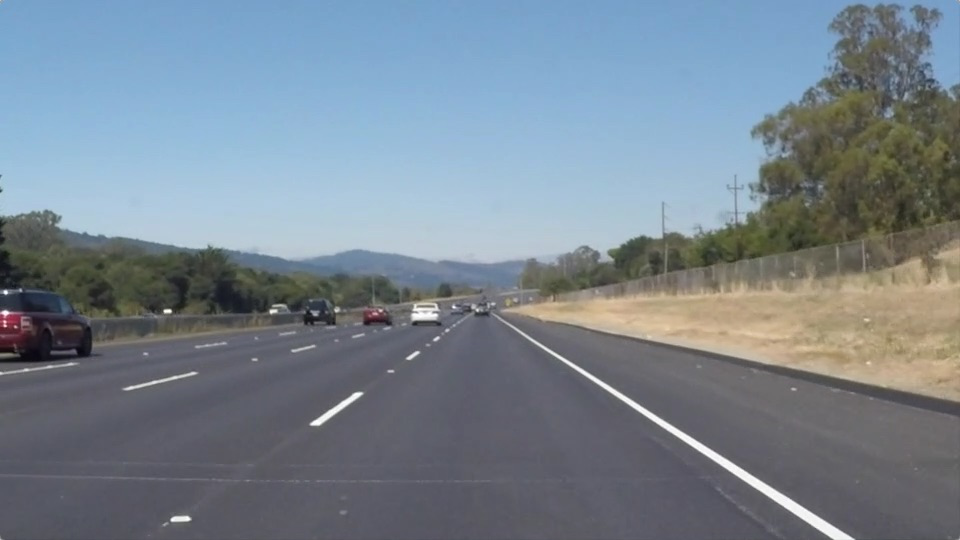

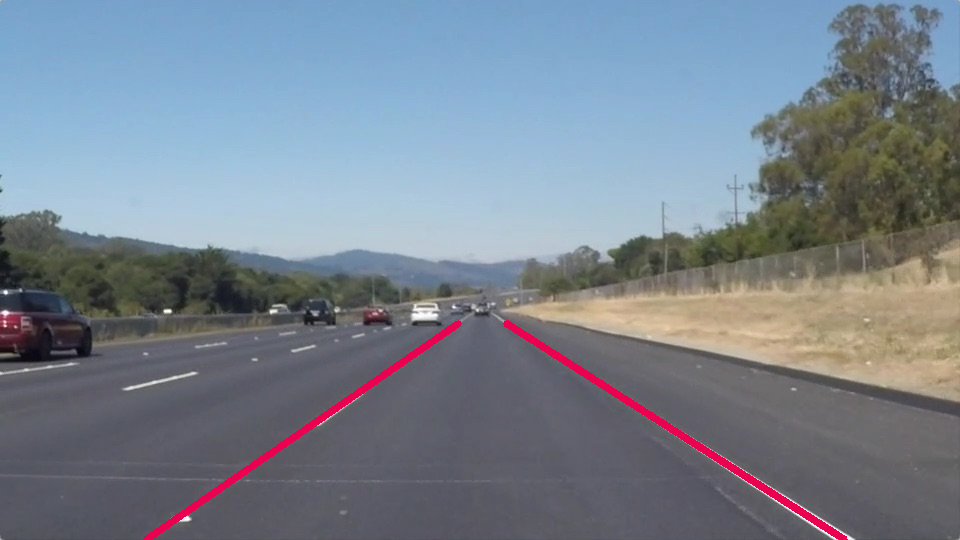

In [3]:
t = reload(t)

w = t.LanesImage(images[1])
t.showarray(w.original_image)

w.mask_lanes()
# t.showarray(w.l_masked)
# t.showarray(w.r_masked)

w.get_hue_and_color()
w.bw_lanes()
# t.showarray(w.l_bw)
# t.showarray(w.r_bw)

w.gaussian_blur()
# t.showarray(w.l_gblur)
# t.showarray(w.r_gblur)

w.canny_edge_detection()
# t.showarray(w.l_canny)
# t.showarray(w.r_canny)

w.line_candidates()
# print w.l_line_candidates

w.smooth_lines()
# print w.l_cand_extended
# print w.l_avg_line

w.draw_lines()
t.showarray(w.base_w_lines)

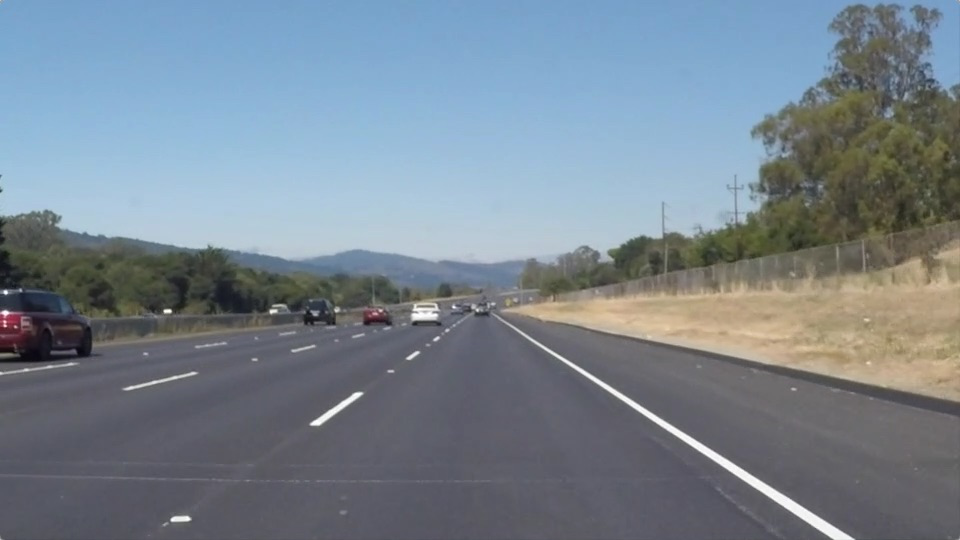

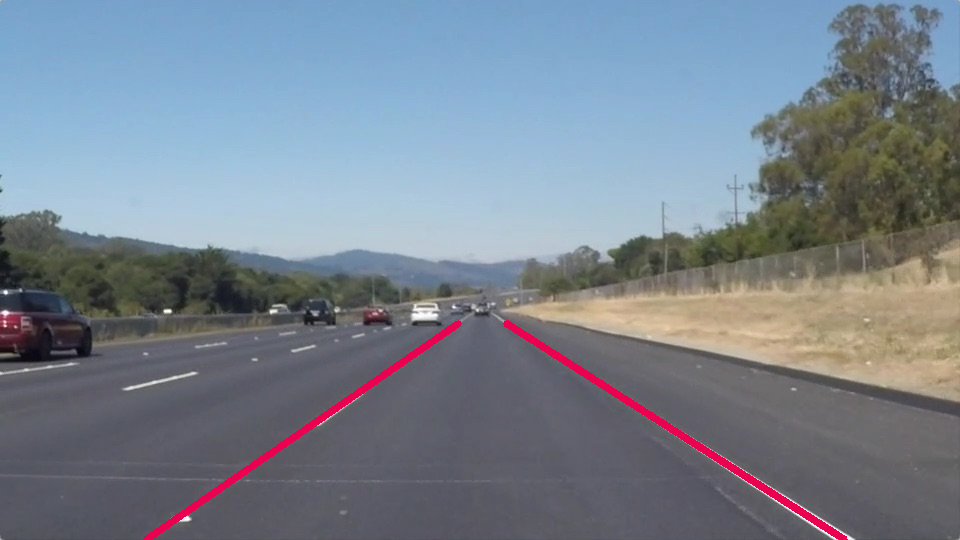

In [4]:
t = reload(t)

w = t.LanesImage(images[1])

t.showarray(w.original_image)
t.showarray(w.create_lane_lines())

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [5]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [6]:
t = reload(t)

counter = 0

previous_lines_l = []
previous_lines_r = []

def process_image(image):    
    lanes = t.LanesImage(image)
    output = lanes.create_lane_lines(lines_buffer = [previous_lines_l, previous_lines_r])

    return output

Let's try the one with the solid white lane on the right first ...

In [7]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:25<00:00,  3.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 21.6 s, sys: 2.7 s, total: 24.3 s
Wall time: 27 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [9]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [01:34<00:00,  6.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 1min 10s, sys: 11.4 s, total: 1min 21s
Wall time: 1min 35s


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

_Note: currently fails on first frame.  Lots of options for what to do to adapt, but given my time constraints, I'll move on._

In [11]:
challenge_output = 'test_videos_output/challenge.mp4'
clip2 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

TypeError: 'NoneType' object is not iterable

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))